In [20]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("../data/participant_demographics.csv")

# Remove duplicate entries based on 'prolific_id', keeping only the first occurrence
df = df.drop_duplicates(subset="prolific_id", keep="first")

# Drop columns that are not part of the demographic analysis
df = df.drop(columns=["prolific_id", "timestamp", "comments", "email"])

# Print the number of rows in the filtered DataFrame
print(f"Number of rows: {df.shape[0]}")

# Display the first few rows of the DataFrame to verify the changes
df.head()

Number of rows: 110


,age_group,country_of_birth,english_proficiency,education_level,political_orientation,meme_familiarity
0,18-25 years old,United States,5 (Native speaker),Bachelor's degree,3 (Moderate),Extremely familiar
1,Over 50 years old,Nigeria,4 (High proficiency),Master's degree,1 (Very Conservative),Moderately familiar
2,26-35 years old,United States,5 (Native speaker),High school diploma or equivalent,3 (Moderate),Extremely familiar
3,26-35 years old,United States,5 (Native speaker),Bachelor's degree,1 (Very Conservative),Very familiar
4,26-35 years old,United States,5 (Native speaker),Doctoral degree (PhD),5 (Very Liberal),Very familiar


# Age Group Distribution

Number of respondents who refused to answer age_group: 0
Age group distribution statistics (Count and Percentage):
18-25: 23 (20.91%)
26-35: 32 (29.09%)
36-50: 36 (32.73%)
Over 50: 19 (17.27%)


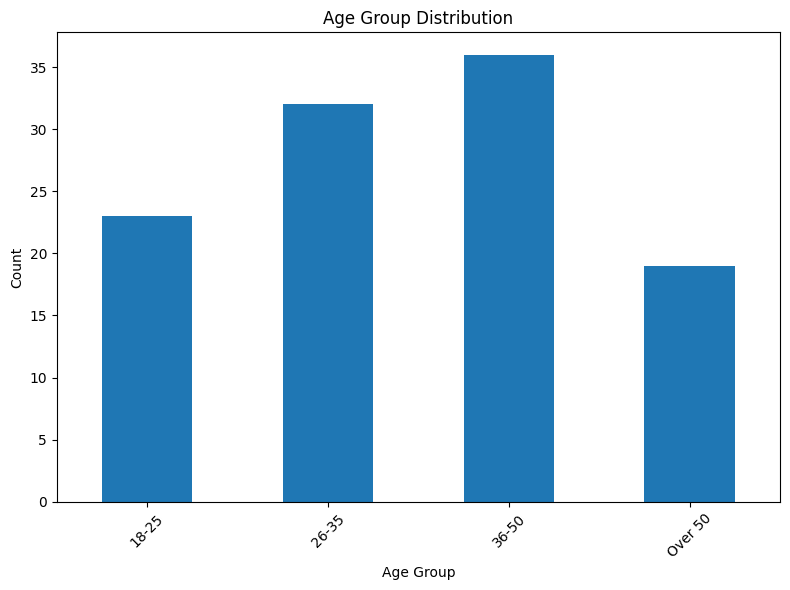

Bar graph saved to ../results/age_group_20250403_154816.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Assuming the previous cell has created a DataFrame named df

# Count how many respondents refused to answer for age_group
refused_count = df[df['age_group'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer age_group: {refused_count}")

# Filter out rows where age_group is "I prefer not to answer"
df_age = df[df['age_group'] != 'I prefer not to answer'].copy()

# Truncate the 'years old' part from the age_group labels
df_age['age_group'] = df_age['age_group'].str.replace(" years old", "", regex=False)

# Define the desired order for the age groups
age_order = ["Less than 18", "18-25", "26-35", "36-50", "Over 50"]

# Count the frequency of each age group and reindex to ensure the specified order
age_counts = df_age['age_group'].value_counts().reindex(age_order, fill_value=0)

# If there are no participants in the "Less than 18" category, drop it from the plot and statistics
if age_counts["Less than 18"] == 0:
    age_counts = age_counts.drop("Less than 18")

# Compute total and percentages for each age group
total_counts = age_counts.sum()
age_percentages = (age_counts / total_counts * 100).round(2)

# Print statistics of the distribution including percentages
print("Age group distribution statistics (Count and Percentage):")
for group in age_counts.index:
    print(f"{group}: {age_counts[group]} ({age_percentages[group]}%)")

# Create a bar graph for the age group distribution
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"age_group_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")

# Country of birth distribution

Number of respondents who refused to answer country_of_birth: 3
Country of birth distribution statistics (Count and Percentage):
United States: 98 (91.59%)
Ghana: 7 (6.54%)
Nigeria: 1 (0.93%)
France: 1 (0.93%)


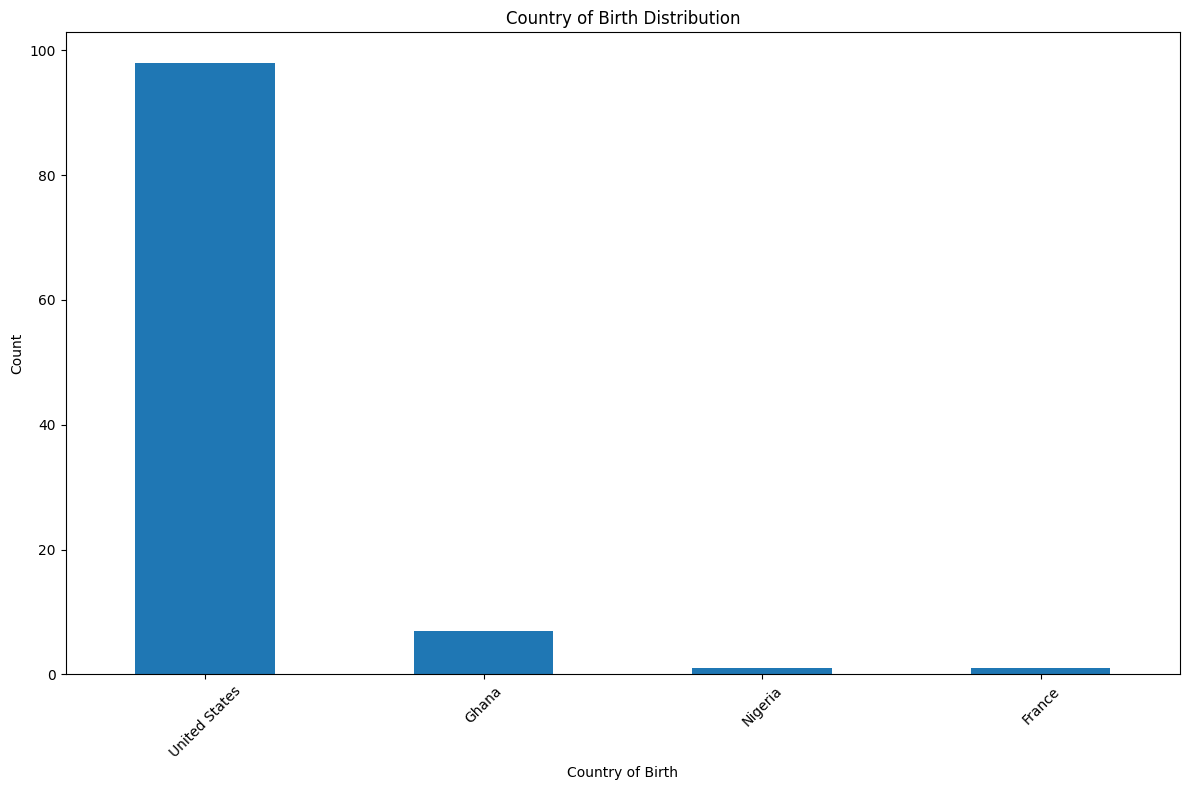

Bar graph saved to ../results/country_of_birth_20250403_155214.png


In [9]:
# Count how many respondents refused to answer for country_of_birth
refused_count_country = df[df['country_of_birth'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer country_of_birth: {refused_count_country}")

# Filter out rows where country_of_birth is "I prefer not to answer"
df_country = df[df['country_of_birth'] != 'I prefer not to answer'].copy()

# Count the frequency of each country (sorted in descending order by count)
country_counts = df_country['country_of_birth'].value_counts()

# Compute the total count and percentages for each country
total_country = country_counts.sum()
country_percentages = (country_counts / total_country * 100).round(2)

# Print statistics of the distribution including percentages
print("Country of birth distribution statistics (Count and Percentage):")
for country in country_counts.index:
    print(f"{country}: {country_counts[country]} ({country_percentages[country]}%)")

# Create a bar graph for the country of birth distribution
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')
plt.title("Country of Birth Distribution")
plt.xlabel("Country of Birth")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"country_of_birth_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory and display it
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")

# English Proficiency Distribution

Number of respondents who refused to answer english_proficiency: 1
English proficiency distribution statistics (Count and Percentage):
Native: 99 (90.83%)
High: 8 (7.34%)
Others: 2 (1.83%)


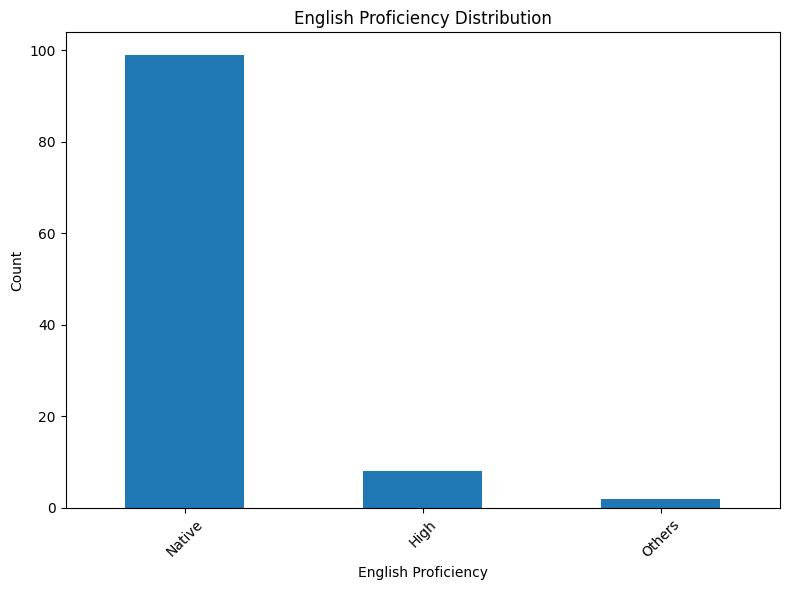

Bar graph saved to ../results/english_proficiency_20250409_142828.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Count how many respondents refused to answer english_proficiency
refused_count_eng = df[df['english_proficiency'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer english_proficiency: {refused_count_eng}")

# Filter out rows where english_proficiency is "I prefer not to answer"
df_eng = df[df['english_proficiency'] != 'I prefer not to answer'].copy()

# Define the mapping for the english_proficiency labels
mapping = {
    "1 (Uncomfortable but can read in English)": "Others",
    "2 (Basic comprehension)": "Others",
    "3 (Moderate proficiency)": "Moderate",
    "4 (High proficiency)": "High",
    "5 (Native speaker)": "Native"
}

# Map the english_proficiency column to simplified labels
df_eng['english_proficiency'] = df_eng['english_proficiency'].replace(mapping)

# Count the frequency of each mapped english proficiency level
eng_counts = df_eng['english_proficiency'].value_counts()

# Compute the total count and percentages for each level
total_eng = eng_counts.sum()
eng_percentages = (eng_counts / total_eng * 100).round(2)

# Print statistics of the distribution including percentages
print("English proficiency distribution statistics (Count and Percentage):")
for level in eng_counts.index:
    print(f"{level}: {eng_counts[level]} ({eng_percentages[level]}%)")

# Create a bar graph for the english proficiency distribution
plt.figure(figsize=(8, 6))
eng_counts.plot(kind='bar')
plt.title("English Proficiency Distribution")
plt.xlabel("English Proficiency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"english_proficiency_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory and display it
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")

# Level of Education Distribution

Number of respondents who refused to answer education_level: 0
Education level distribution statistics (Count and Percentage):
High school: 47 (42.73%)
Bachelor's: 44 (40.0%)
Master's: 15 (13.64%)
PhD: 4 (3.64%)


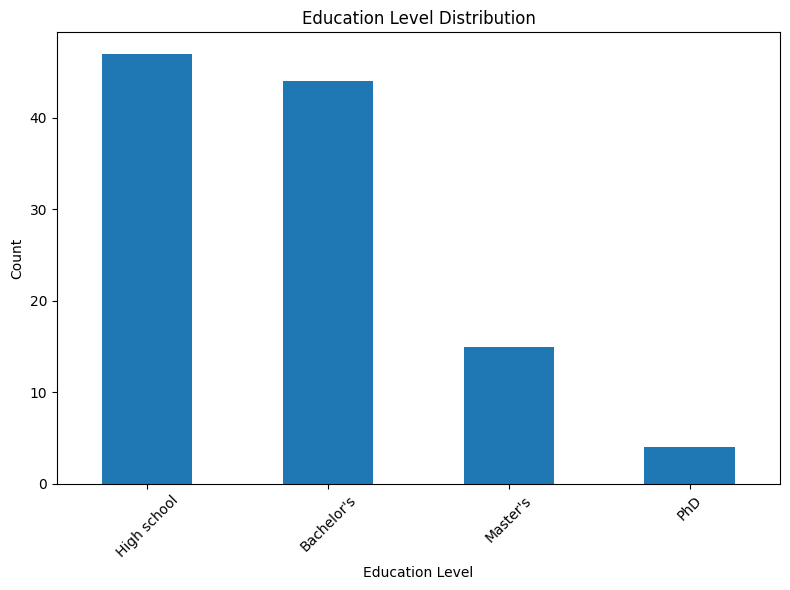

Bar graph saved to ../results/education_level_20250403_161230.png


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Count how many respondents refused to answer for education_level
refused_count_edu = df[df['education_level'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer education_level: {refused_count_edu}")

# Filter out rows where education_level is "I prefer not to answer"
df_edu = df[df['education_level'] != 'I prefer not to answer'].copy()

# Define the mapping for the education_level labels
edu_mapping = {
    "Elementary education": "Elementary",
    "High school diploma or equivalent": "High school",
    "Bachelor's degree": "Bachelor's",
    "Master's degree": "Master's",
    "Doctoral degree (PhD)": "PhD"
}

# Map the education_level column to simplified labels
df_edu['education_level'] = df_edu['education_level'].replace(edu_mapping)

# Define the desired order for the education levels
edu_order = ["Elementary", "High school", "Bachelor's", "Master's", "PhD"]

# Count the frequency of each education level and reindex to the specified order
edu_counts = df_edu['education_level'].value_counts().reindex(edu_order, fill_value=0)

# If there are no participants in the "Elementary" category, drop it from the plot and statistics
if edu_counts["Elementary"] == 0:
    edu_counts = edu_counts.drop("Elementary")
    edu_order = [level for level in edu_order if level != "Elementary"]

# Compute the total count and percentages for each level
total_edu = edu_counts.sum()
edu_percentages = (edu_counts / total_edu * 100).round(2)

# Print statistics of the distribution (Count and Percentage)
print("Education level distribution statistics (Count and Percentage):")
for level in edu_order:
    print(f"{level}: {edu_counts[level]} ({edu_percentages[level]}%)")

# Create a bar graph for the education level distribution
plt.figure(figsize=(8, 6))
edu_counts.plot(kind='bar')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"education_level_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory and display it
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")

# Political Orientation Distribution

Number of respondents who refused to answer political_orientation: 3
Political Orientation distribution statistics (Count and Percentage):
VL: 27 (25.23%)
ML: 21 (19.63%)
Moderate: 29 (27.1%)
MC: 13 (12.15%)
VC: 17 (15.89%)


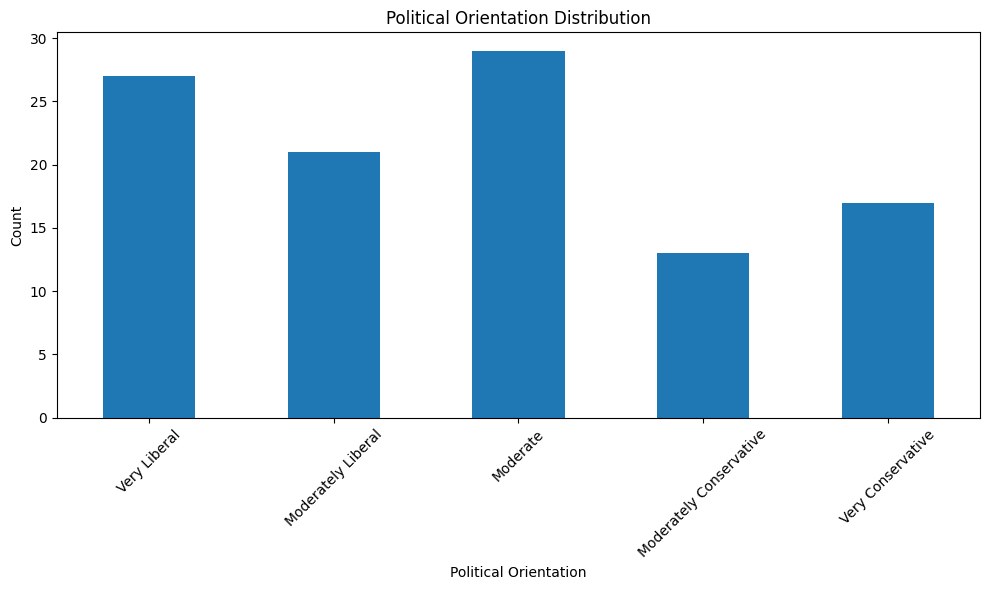

Bar graph saved to ../results/political_orientation_20250423_130550.png


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Count how many respondents refused to answer for political_orientation
refused_count_pol = df[df['political_orientation'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer political_orientation: {refused_count_pol}")

# Filter out rows where political_orientation is "I prefer not to answer"
df_pol = df[df['political_orientation'] != 'I prefer not to answer'].copy()

# Define mapping for political_orientation (short labels)
pol_mapping_short = {
    "1 (Very Conservative)": "VC",
    "2 (Moderately Conservative)": "MC",
    "3 (Moderate)": "Moderate",
    "4 (Moderately Liberal)": "ML",
    "5 (Very Liberal)": "VL"
}

# Define mapping for political_orientation (full labels for the legend/x-axis)
pol_mapping_full = {
    "VC": "Very Conservative",
    "MC": "Moderately Conservative",
    "Moderate": "Moderate",
    "ML": "Moderately Liberal",
    "VL": "Very Liberal"
}

# Map the political_orientation column to simplified short labels
df_pol['political_orientation'] = df_pol['political_orientation'].replace(pol_mapping_short)

# Define the desired order for the political orientation labels (short labels)
pol_order_short = ["VL", "ML", "Moderate", "MC", "VC"]

# Count the frequency of each political orientation and reindex to the specified order
pol_counts = df_pol['political_orientation'].value_counts().reindex(pol_order_short, fill_value=0)

# Compute the total count and percentages for each orientation
total_pol = pol_counts.sum()
pol_percentages = (pol_counts / total_pol * 100).round(2)

# Print statistics of the distribution (Count and Percentage)
print("Political Orientation distribution statistics (Count and Percentage):")
for orientation_short in pol_order_short:
    print(f"{orientation_short}: {pol_counts[orientation_short]} ({pol_percentages[orientation_short]}%)")

# Create a bar graph for the political orientation distribution
plt.figure(figsize=(10, 6))
ax = pol_counts.plot(kind='bar')
plt.title("Political Orientation Distribution")
plt.xlabel("Political Orientation")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Get the current x-axis tick labels (short forms)
short_labels = pol_counts.index

# Map the short labels to the full descriptions for the x-axis ticks
full_labels = [pol_mapping_full[label] for label in short_labels]

# Set the new x-axis tick labels
ax.set_xticklabels(full_labels)

plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"political_orientation_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory and display it
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")

# Meme culture familiarity Distribution

Number of respondents who refused to answer meme_familiarity: 1
Meme Familiarity distribution statistics (Count and Percentage):
Not at all: 3 (2.75%)
Slightly: 8 (7.34%)
Moderately: 35 (32.11%)
Very: 28 (25.69%)
Extremely: 35 (32.11%)


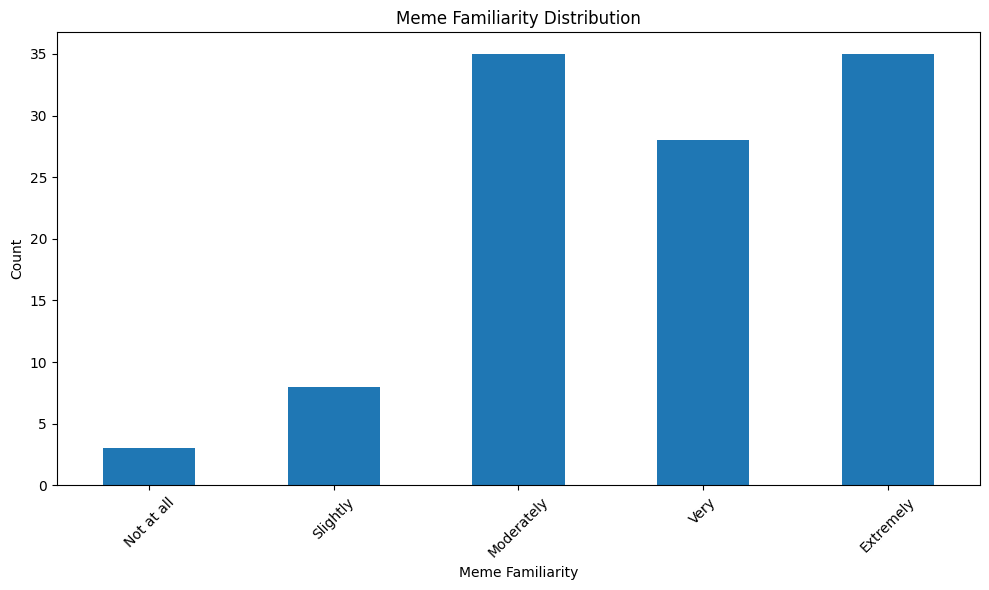

Bar graph saved to ../results/meme_familiarity_20250403_162021.png


In [17]:
# Count how many respondents refused to answer for meme_familiarity
refused_count_meme = df[df['meme_familiarity'] == 'I prefer not to answer'].shape[0]
print(f"Number of respondents who refused to answer meme_familiarity: {refused_count_meme}")

# Filter out rows where meme_familiarity is "I prefer not to answer"
df_meme = df[df['meme_familiarity'] != 'I prefer not to answer'].copy()

# Define mapping for meme_familiarity from the processed values to simplified labels
meme_mapping = {
    "Not familiar at all": "Not at all",
    "Slightly familiar": "Slightly",
    "Moderately familiar": "Moderately",
    "Very familiar": "Very",
    "Extremely familiar": "Extremely"
}

# Map the meme_familiarity column to simplified labels
df_meme['meme_familiarity'] = df_meme['meme_familiarity'].replace(meme_mapping)

# Define the desired order for the meme familiarity levels
meme_order = ["Not at all", "Slightly", "Moderately", "Very", "Extremely"]

# Count the frequency of each meme familiarity level and reindex to the specified order
meme_counts = df_meme['meme_familiarity'].value_counts().reindex(meme_order, fill_value=0)

# Compute the total count and percentages for each level
total_meme = meme_counts.sum()
meme_percentages = (meme_counts / total_meme * 100).round(2)

# Print statistics of the distribution (Count and Percentage)
print("Meme Familiarity distribution statistics (Count and Percentage):")
for level in meme_order:
    print(f"{level}: {meme_counts[level]} ({meme_percentages[level]}%)")

# Create a bar graph for the meme familiarity distribution
plt.figure(figsize=(10, 6))
meme_counts.plot(kind='bar')
plt.title("Meme Familiarity Distribution")
plt.xlabel("Meme Familiarity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"meme_familiarity_{timestamp}.png"
output_path = os.path.join("..", "plots", filename)

# Save the plot to the specified directory and display it
plt.savefig(output_path)
plt.show()

print(f"Bar graph saved to {output_path}")